In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
train_data = pd.read_csv("./Data/train.csv")
train_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [3]:
test_data = pd.read_csv("./Data/test.csv")
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

## Change values to correlation analysis

In [5]:
# Change yes and no to 1 and 0
train_data['Gender'] = train_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
train_data['FAVC'] = train_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
train_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
train_data['SCC'] = train_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


## Correlation analysis

<AxesSubplot:>

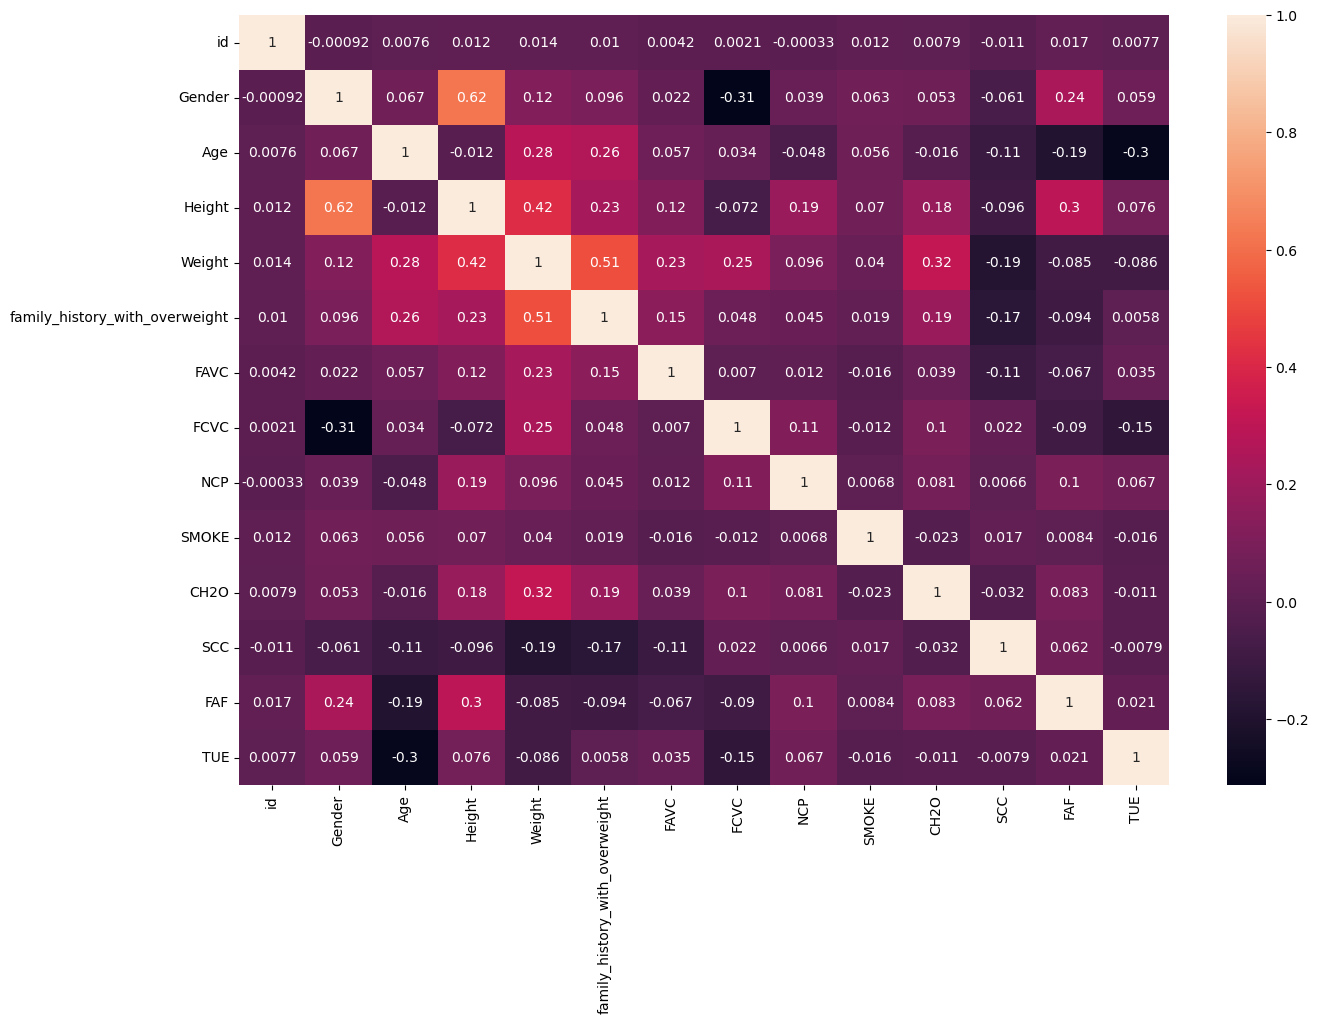

In [273]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.select_dtypes('number').corr(), annot=True)

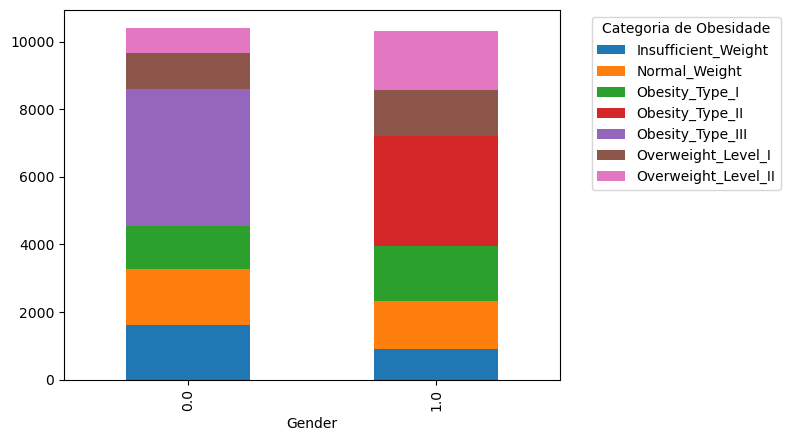

In [275]:
# Check gender distribution in the dataset and make graphs
train_data.groupby(['Gender', 'NObeyesdad']).size().unstack().plot(kind='bar', stacked=True)
# Mostrar o gráfico
plt.legend(title='Categoria de Obesidade', bbox_to_anchor=(1.05, 1), loc='upper left')

In [276]:
# Ordem desejada das linhas
order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
         'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Text(0, 0.5, 'Age')

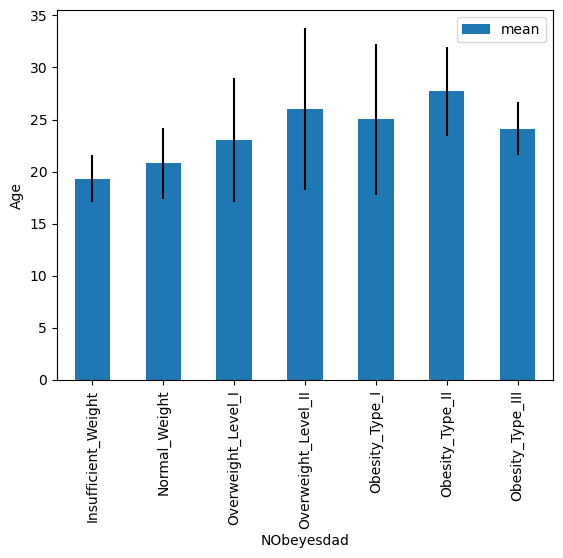

In [277]:
# Check age mean and std for each class
age_counts = train_data.groupby('NObeyesdad')['Age'].agg(['mean', 'std'])

# Reorder the rows
age_counts = age_counts.reindex(order)

# Check the distribution of the age in the dataset
age_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Age')

Text(0, 0.5, 'Weight (kg)')

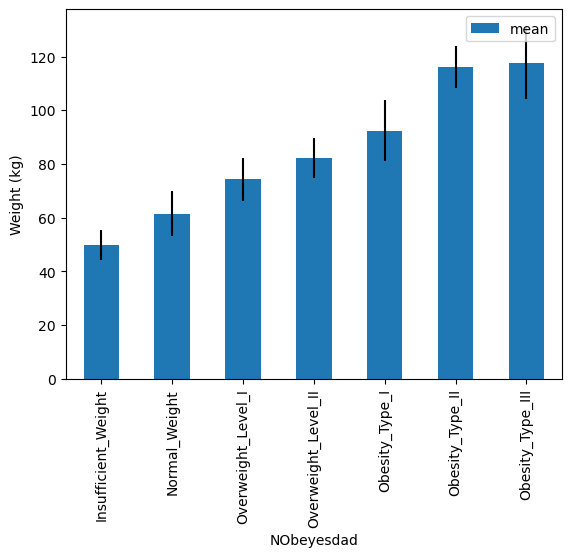

In [278]:
# Check weight mean and std for each class
weight_counts = train_data.groupby('NObeyesdad')['Weight'].agg(['mean', 'std'])

# Reorder the rows
weight_counts = weight_counts.reindex(order)

# Check the distribution of the weight in the dataset
weight_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Weight (kg)')


<AxesSubplot:xlabel='family_history_with_overweight'>

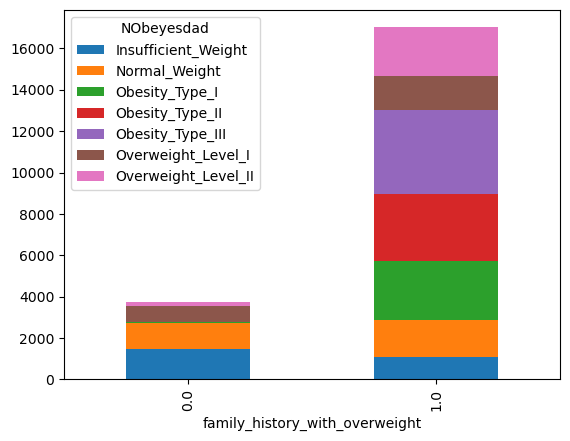

In [279]:
# Check family history distribution in the dataset and make graphs
train_data.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack().plot(kind='bar', stacked=True)

Text(0, 0.5, 'Consume high-calorie foods frequently')

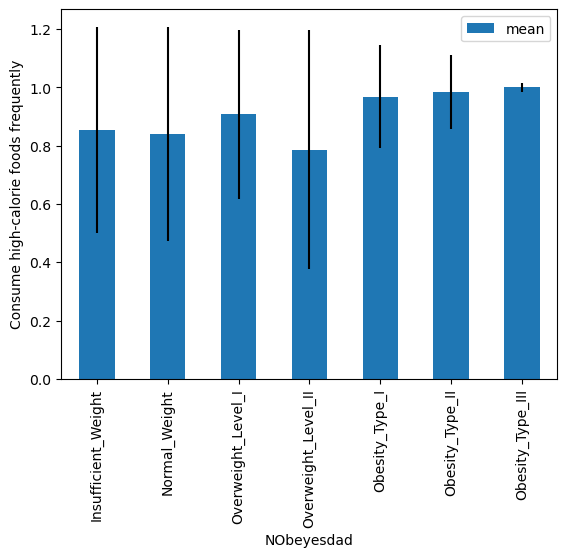

In [280]:
# Check FAVC mean and std for each class
favc_counts = train_data.groupby('NObeyesdad')['FAVC'].agg(['mean', 'std'])

# Reorder the rows
favc_counts = favc_counts.reindex(order)

# Check the distribution of the FAVC in the dataset
favc_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Consume high-calorie foods frequently')

Text(0, 0.5, 'Number of meals where you usually eat vegetables')

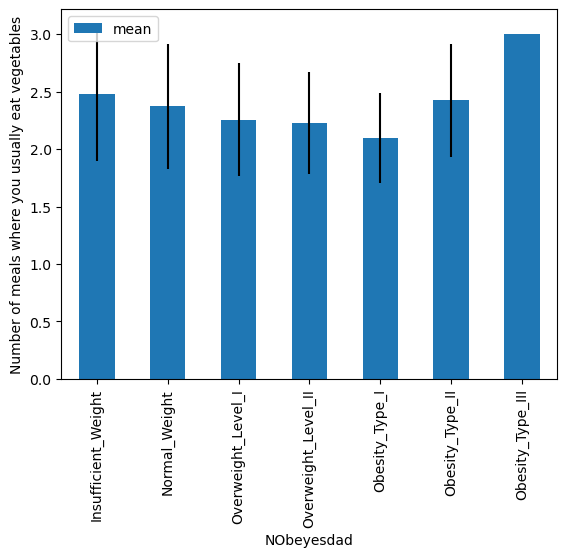

In [281]:
# Check FCVC mean and std for each class
fcvc_counts = train_data.groupby('NObeyesdad')['FCVC'].agg(['mean', 'std'])

# Reorder rows
fcvc_counts = fcvc_counts.reindex(order)

# Check the distribution of the FCVC in the dataset
fcvc_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Number of meals where you usually eat vegetables')

Text(0, 0.5, 'Number of main meals')

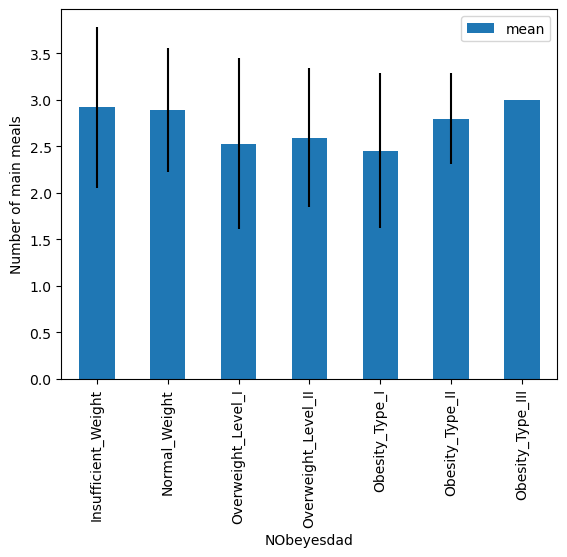

In [282]:
# Check NCP mean and std for each class
ncp_counts = train_data.groupby('NObeyesdad')['NCP'].agg(['mean', 'std'])

# Reorder rows
ncp_counts = ncp_counts.reindex(order)

# Check the distribution of the NCP in the dataset
ncp_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Number of main meals')

Text(0, 0.5, 'Consumption of food between meals')

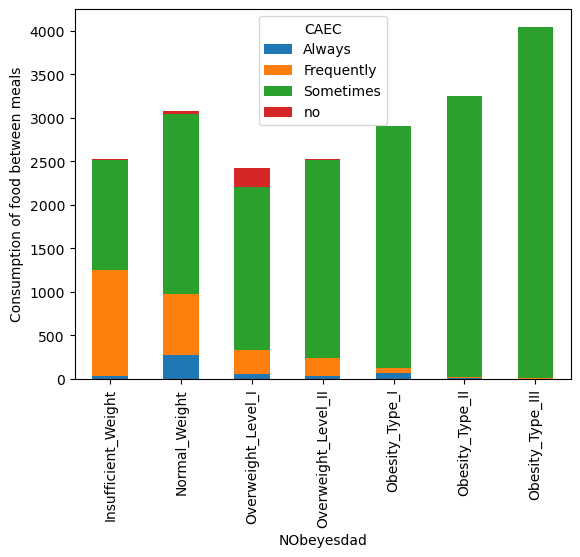

In [283]:
# Check CAEC for each class
caec_counts = train_data.groupby('NObeyesdad')['CAEC'].value_counts().unstack()

# Reorder rows
caec_counts = caec_counts.reindex(order)

# Check the distribution of the CAEC in the dataset
caec_counts.plot(kind='bar', stacked=True)

plt.ylabel('Consumption of food between meals')

Text(0, 0.5, 'Smoking habit')

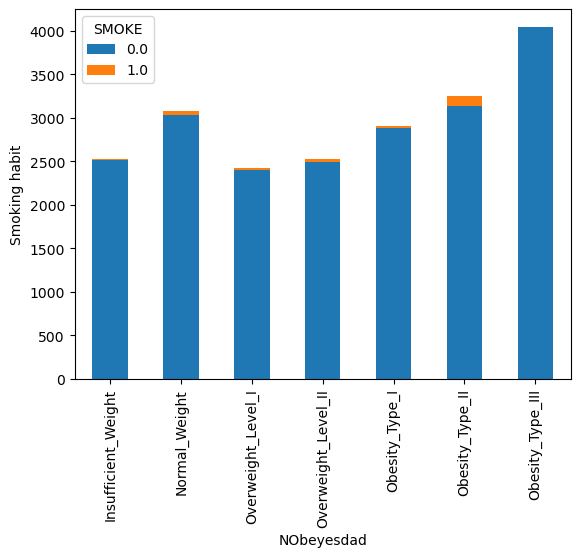

In [284]:
# Check SMOKE for each class
smoke_counts = train_data.groupby('NObeyesdad')['SMOKE'].value_counts().unstack()

# Reorder rows
smoke_counts = smoke_counts.reindex(order)

# Check the distribution of the SMOKE in the dataset
smoke_counts.plot(kind='bar', stacked=True)

plt.ylabel('Smoking habit')

Text(0, 0.5, 'Consumption of water daily')

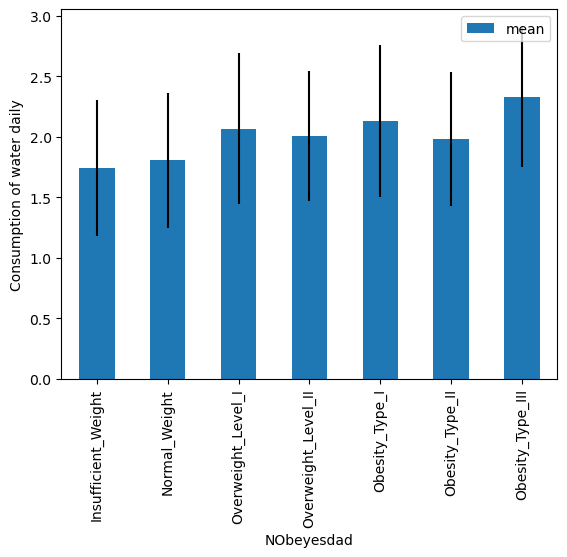

In [285]:
# Check CH2O mean and std for each class
ch2o_counts = train_data.groupby('NObeyesdad')['CH2O'].agg(['mean', 'std'])

# Reorder rows
ch2o_counts = ch2o_counts.reindex(order)

# Check the distribution of the CH2O in the dataset
ch2o_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Consumption of water daily')

Text(0, 0.5, 'Calories consumption monitoring')

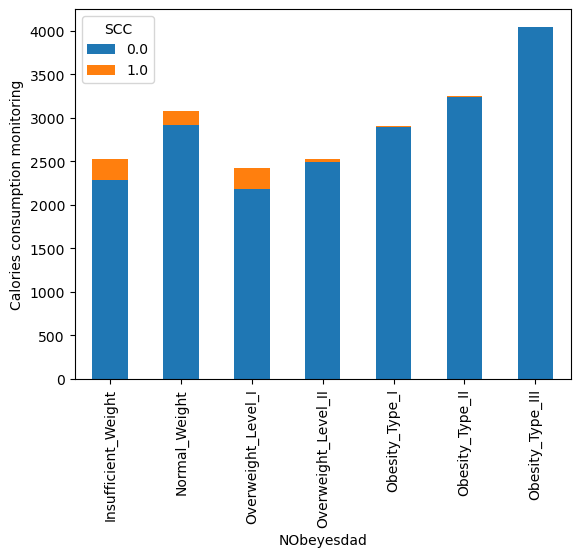

In [286]:
# Check SCC for each class
scc_counts = train_data.groupby('NObeyesdad')['SCC'].value_counts().unstack()

# Reorder rows
scc_counts = scc_counts.reindex(order)

# Check the distribution of the SCC in the dataset
scc_counts.plot(kind='bar', stacked=True)

plt.ylabel('Calories consumption monitoring')

Text(0, 0.5, 'Physical activity frequency')

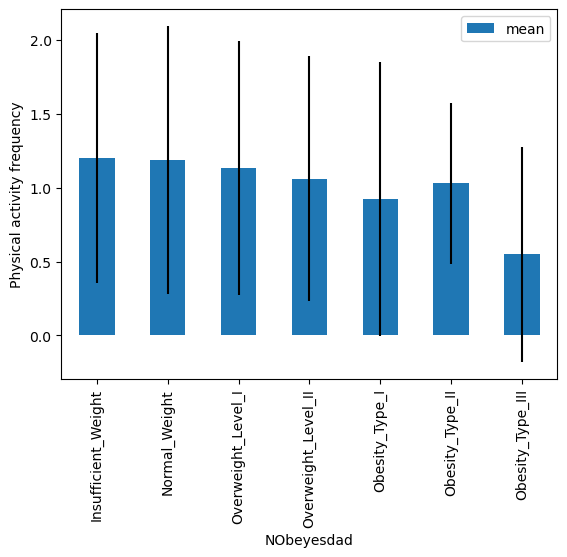

In [287]:
# Check FAF mean and std for each class
faf_counts = train_data.groupby('NObeyesdad')['FAF'].agg(['mean', 'std'])

# Reorder rows
faf_counts = faf_counts.reindex(order)

# Check the distribution of the FAF in the dataset
faf_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Physical activity frequency')

Text(0, 0.5, 'Time using technology devices')

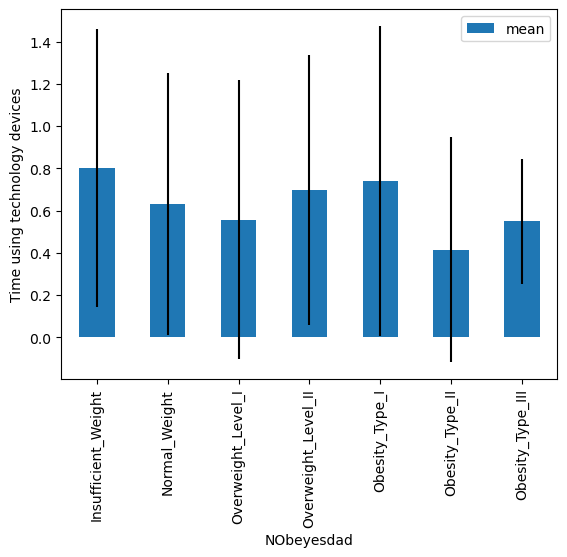

In [288]:
# Check TUE mean and std for each class
tue_counts = train_data.groupby('NObeyesdad')['TUE'].agg(['mean', 'std'])

# Reorder rows
tue_counts = tue_counts.reindex(order)

# Check the distribution of the TUE in the dataset
tue_counts.plot(kind='bar', y='mean', yerr='std')

plt.ylabel('Time using technology devices')

Text(0, 0.5, 'Consumption of alcohol')

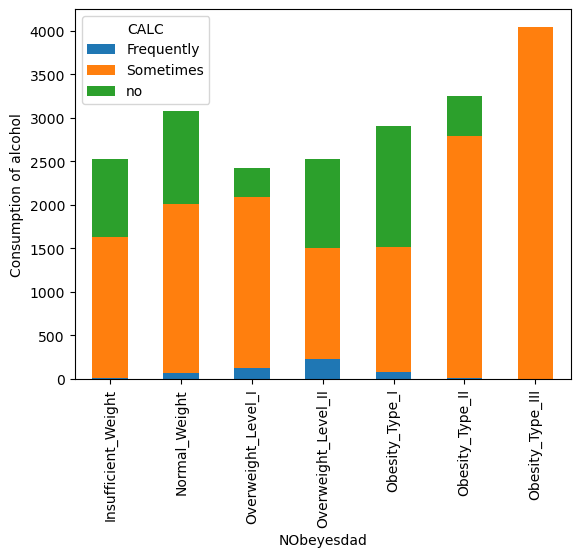

In [289]:
# Check CALC for each class
calc_counts = train_data.groupby('NObeyesdad')['CALC'].value_counts().unstack()

# Reorder rows
calc_counts = calc_counts.reindex(order)

# Check the distribution of the CALC in the dataset
calc_counts.plot(kind='bar', stacked=True)

plt.ylabel('Consumption of alcohol')

Text(0, 0.5, 'Transportation used')

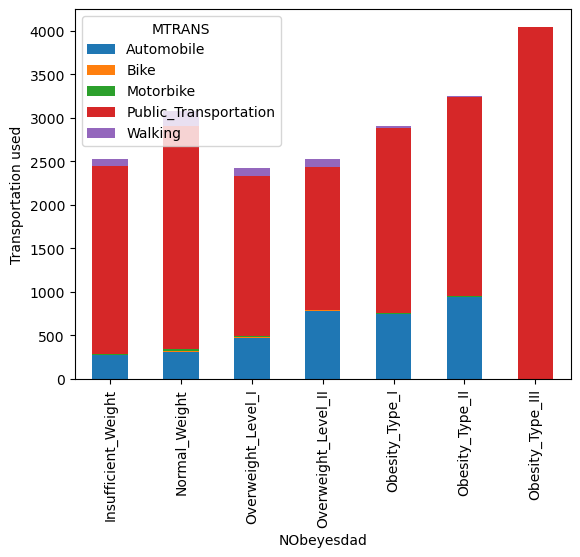

In [290]:
# Check MTRANS for each class
mtrans_counts = train_data.groupby('NObeyesdad')['MTRANS'].value_counts().unstack()

# Reorder rows
mtrans_counts = mtrans_counts.reindex(order)

# Check the distribution of the MTRANS in the dataset
mtrans_counts.plot(kind='bar', stacked=True)

plt.ylabel('Transportation used')

## Data distribuition

KeyboardInterrupt: 

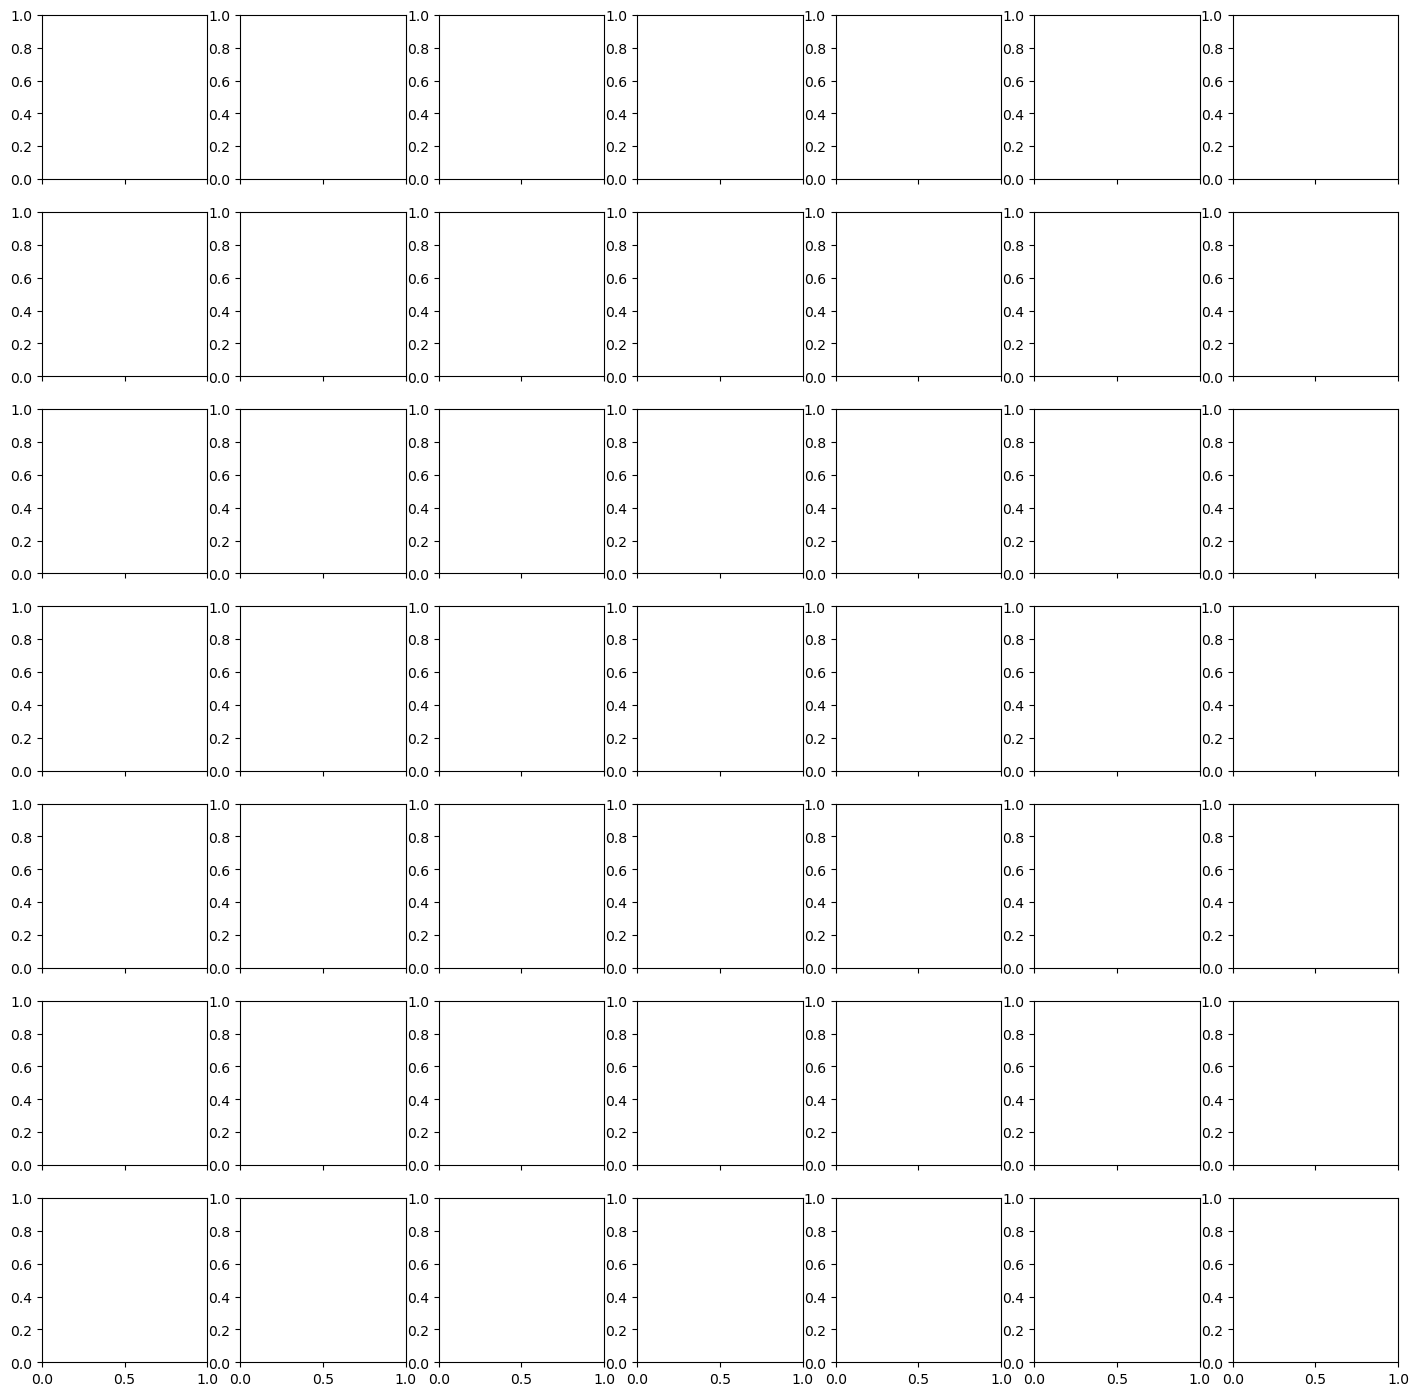

In [291]:
sns.pairplot(train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')


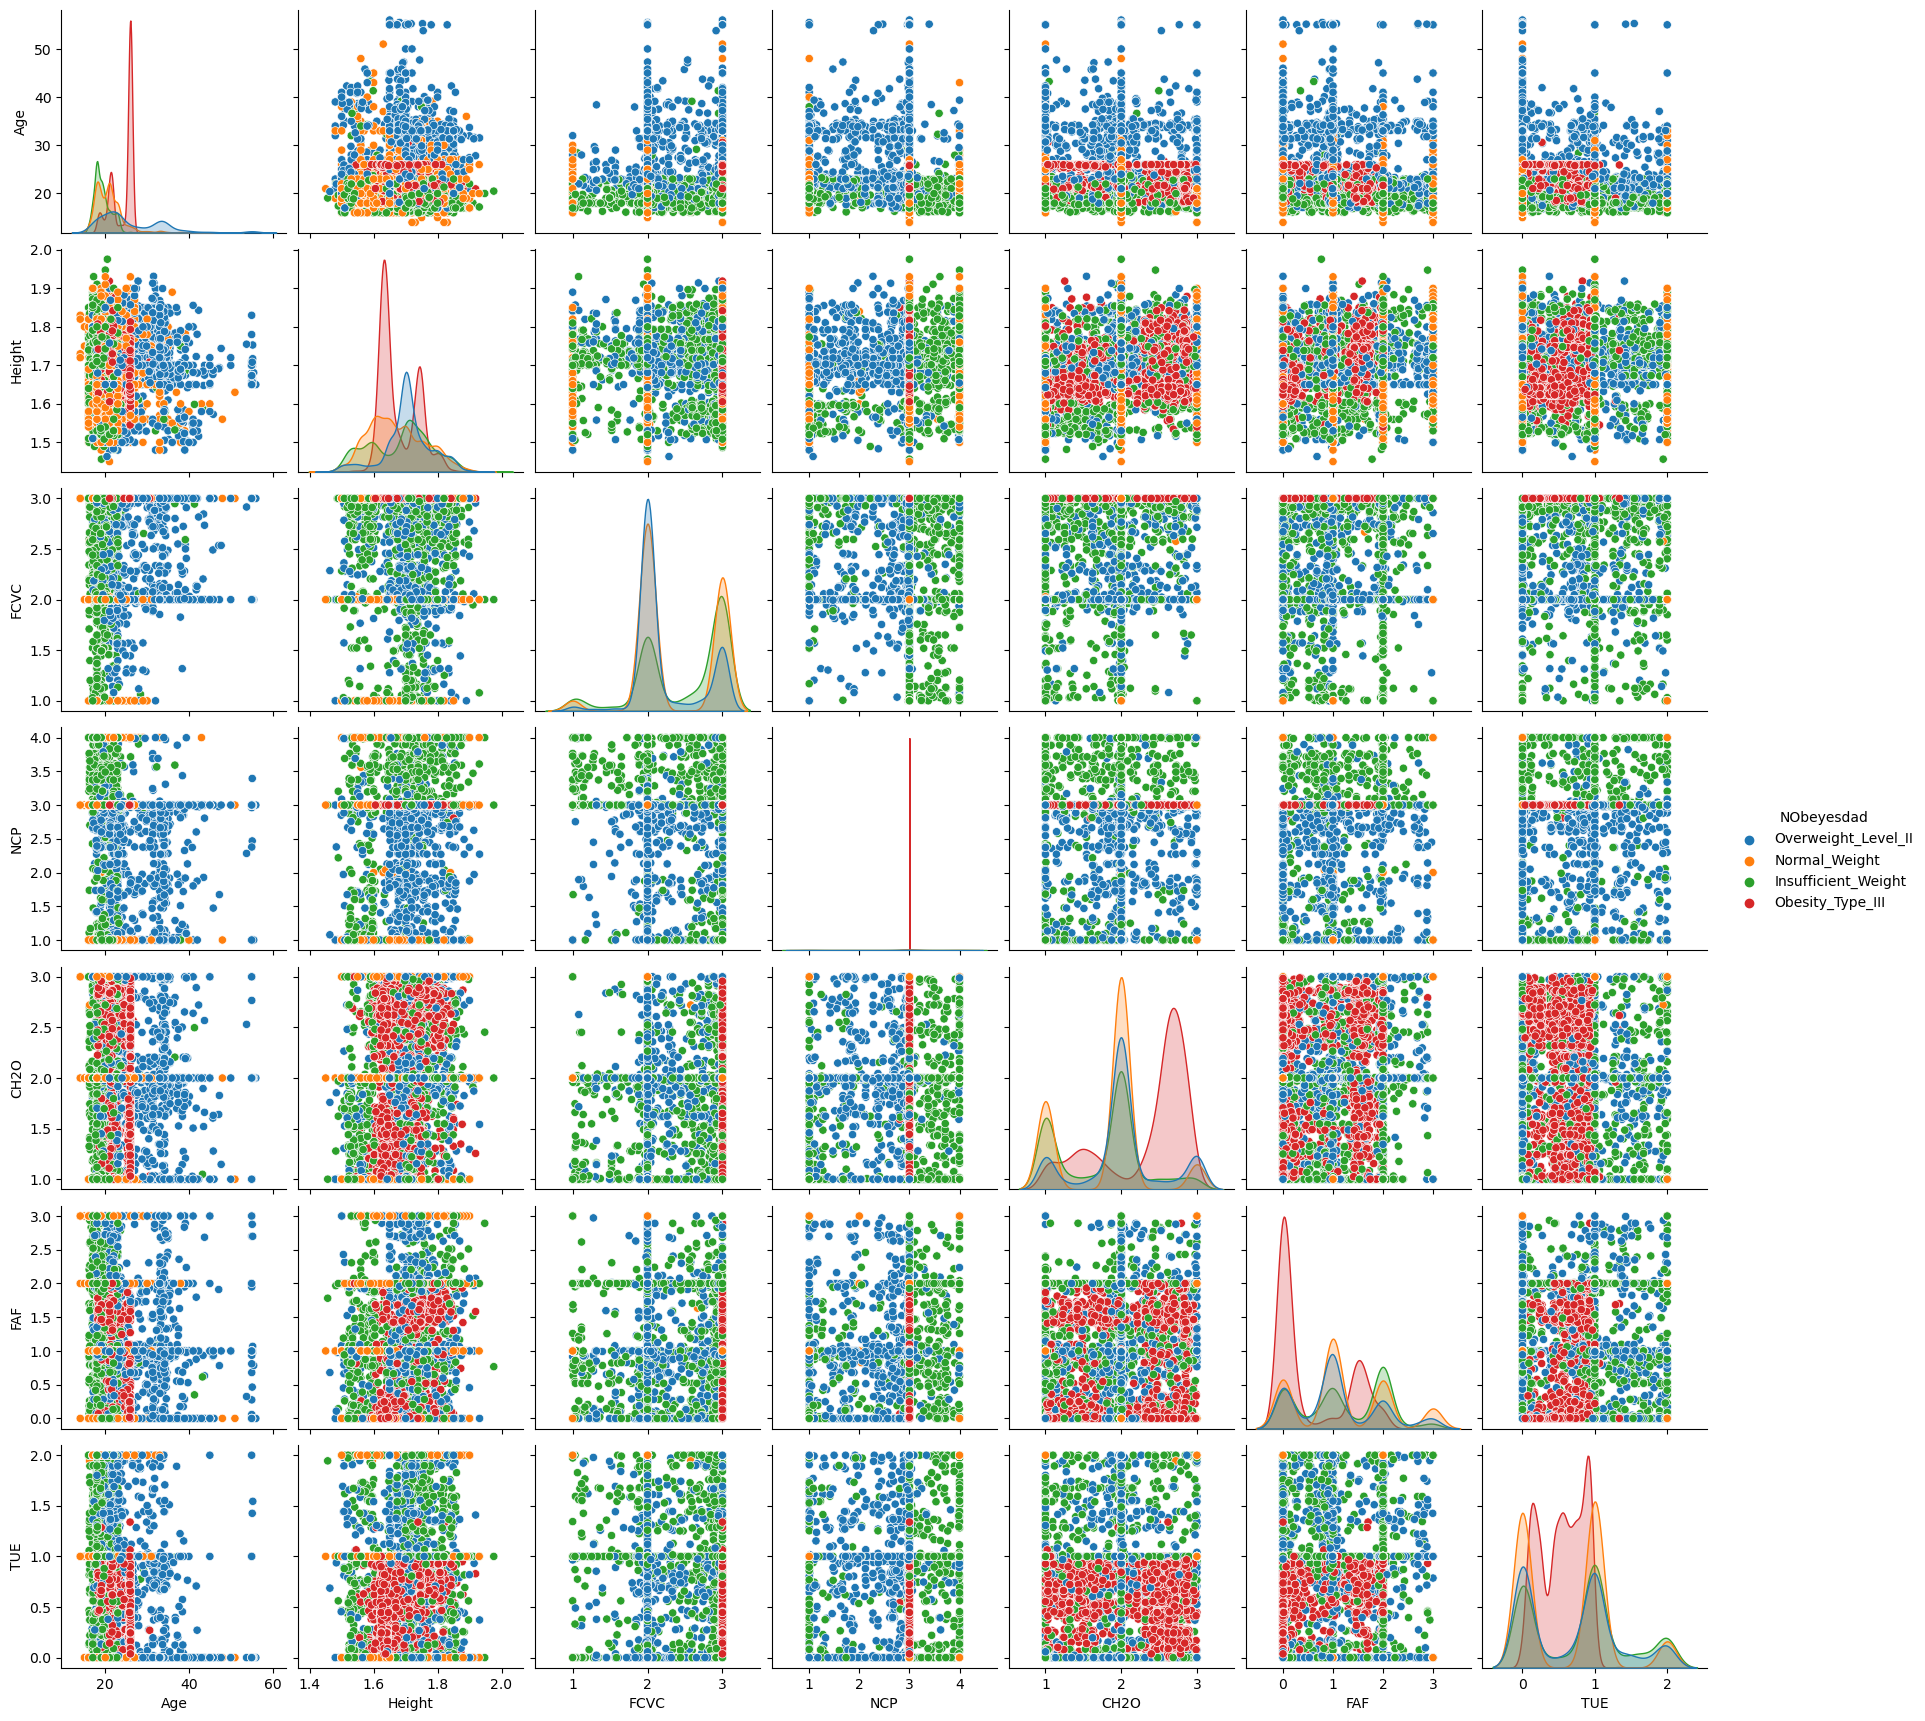

In [8]:
filtered_train_data = train_data[train_data['NObeyesdad'].isin(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III'])]
sns.pairplot(filtered_train_data[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','MTRANS','NObeyesdad']], hue = 'NObeyesdad')


## See categorical data

In [9]:
train_data['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [10]:
train_data['CAEC'].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [11]:
train_data['CALC'].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

In [12]:
train_data['MTRANS'].value_counts()

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64

## Encode columns

In [6]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Defina as categorias como uma lista simples
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always'], ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]

# Inicialize o codificador ordinal
ord_enc = OrdinalEncoder(categories=categories)

# Aplique o codificador ordinal aos dados
ord_encoded_data = ord_enc.fit_transform(train_data[['CAEC', 'CALC', 'NObeyesdad']])

# Aplicar one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(train_data[['MTRANS']])

# Convertendo a matriz esparsa para um DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names()


In [7]:
# Concatenar os DataFrames
train_data = pd.concat([train_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label', 'NObeyesdad_Label']), one_hot_encoded_data], axis=1)

# Remover as colunas originais
train_data = train_data.drop(columns=['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'])


In [8]:
train_data.head()

id  Gender        Age    Height      Weight  \
0   0     1.0  24.443011  1.699998   81.669950   
1   1     0.0  18.000000  1.560000   57.000000   
2   2     0.0  18.000000  1.711460   50.165754   
3   3     0.0  20.952737  1.710730  131.274851   
4   4     1.0  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  SMOKE  ...  \
0                             1.0   1.0  2.000000  2.983297    0.0  ...   
1                             1.0   1.0  2.000000  3.000000    0.0  ...   
2                             1.0   1.0  1.880534  1.411685    0.0  ...   
3                             1.0   1.0  3.000000  3.000000    0.0  ...   
4                             1.0   1.0  2.679664  1.971472    0.0  ...   

        FAF       TUE  CAEC_Label  CALC_Label  NObeyesdad_Label  \
0  0.000000  0.976473         1.0         1.0               3.0   
1  1.000000  1.000000         2.0         0.0               1.0   
2  0.866045  1.673584         1.0         0.0               0.0   
3  1.467863  0.780199         1.0         1.0               6.0   
4  1.967973  0.931721         1.0         1.0               3.0   

   x0_Automobile  x0_Bike  x0_Motorbike  x0_Public_Transportation  x0_Walking  
0            0.0      0.0           0.0                       1.0         0.0  
1            1.0      0.0           0.0                       0.0         0.0  
2            0.0      0.0           0.0                       1.0         0.0  
3            0.0      0.0           0.0                       1.0         0.0  
4            0.0      0.0           0.0                       1.0         0.0  

[5 rows x 22 columns]

In [295]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) # Example threshold
X_reduced = selector.fit_transform(train_data)

# Print removed columns
removed_columns = train_data.columns[~selector.get_support()]
print(removed_columns)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
reduced_train_data = train_data.iloc[:,cols]


Index(['Height', 'x0_Bike', 'x0_Motorbike'], dtype='object')


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Variance analysis of the features

c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\T-Gamer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

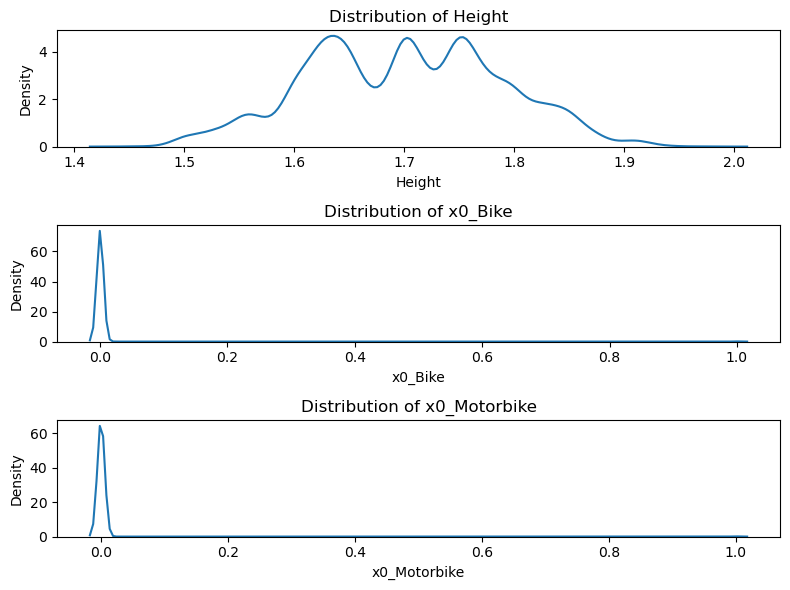

In [296]:
# Crie uma figura e eixos para os três subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 6))

# Plot do gráfico para Height
sns.distplot(train_data['Height'], hist=False, label='Height', ax=axes[0])

# Plot do gráfico para x0_Bike
sns.distplot(train_data['x0_Bike'], hist=False, label='x0_Bike', ax=axes[1])

# Plot do gráfico para x0_Motorbike
sns.distplot(train_data['x0_Motorbike'], hist=False, label='x0_Motorbike', ax=axes[2])

# Adicione rótulos e títulos
axes[0].set_title('Distribution of Height')
axes[1].set_title('Distribution of x0_Bike')
axes[2].set_title('Distribution of x0_Motorbike')

# Ajuste o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()


## Doing the cleaning with test_data

In [298]:
# Change yes and no to 1 and 0
test_data['Gender'] = test_data['Gender'].replace({'Male': 1.0, 'Female': 0.0})
test_data['family_history_with_overweight'] = test_data['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
test_data['FAVC'] = test_data['FAVC'].replace({'yes': 1.0, 'no': 0.0})
test_data['SMOKE'] = train_data['SMOKE'].replace({'yes': 1.0, 'no': 0.0})
test_data['SCC'] = test_data['SCC'].replace({'yes': 1.0, 'no': 0.0})


# Define the categories
categories = [['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently','Always']]

# Apply the ordinal encoder to the data

ord_enc = OrdinalEncoder(categories=categories)
ord_encoded_data = ord_enc.fit_transform(test_data[['CAEC', 'CALC']])

# Apply one hot encoding
one_hot_enc = OneHotEncoder()
one_hot_encoded_data = one_hot_enc.fit_transform(test_data[['MTRANS']])

# Convert the sparse matrix to a DataFrame
one_hot_encoded_data = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_data)
one_hot_encoded_data.columns = one_hot_enc.get_feature_names()

# Concat the DataFrames
test_data = pd.concat([test_data, pd.DataFrame(ord_encoded_data, columns=['CAEC_Label', 'CALC_Label']), one_hot_encoded_data], axis=1)

# Remove the original columns
test_data = test_data.drop(columns=['CAEC', 'CALC', 'MTRANS'])


In [299]:
test_data.head()

id  Gender        Age    Height      Weight  \
0  20758     1.0  26.899886  1.848294  120.644178   
1  20759     0.0  21.000000  1.600000   66.000000   
2  20760     0.0  26.000000  1.643355  111.600553   
3  20761     1.0  20.979254  1.553127  103.669116   
4  20762     0.0  26.000000  1.627396  104.835346   

   family_history_with_overweight  FAVC      FCVC       NCP  SMOKE  ...  SCC  \
0                             1.0   1.0  2.938616  3.000000    0.0  ...  0.0   
1                             1.0   1.0  2.000000  1.000000    0.0  ...  0.0   
2                             1.0   1.0  3.000000  3.000000    0.0  ...  0.0   
3                             1.0   1.0  2.000000  2.977909    0.0  ...  0.0   
4                             1.0   1.0  3.000000  3.000000    0.0  ...  0.0   

        FAF       TUE  CAEC_Label  CALC_Label  x0_Automobile  x0_Bike  \
0  0.855400  0.000000         1.0         1.0            0.0      0.0   
1  1.000000  0.000000         1.0         1.0            0.0      0.0   
2  0.000000  0.250502         1.0         1.0            0.0      0.0   
3  0.094851  0.000000         1.0         1.0            0.0      0.0   
4  0.000000  0.741069         1.0         1.0            0.0      0.0   

   x0_Motorbike  x0_Public_Transportation  x0_Walking  
0           0.0                       1.0         0.0  
1           0.0                       1.0         0.0  
2           0.0                       1.0         0.0  
3           0.0                       1.0         0.0  
4           0.0                       1.0         0.0  

[5 rows x 21 columns]

In [300]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) # Example threshold
X_reduced = selector.fit_transform(test_data)

# Print removed columns
removed_columns = test_data.columns[~selector.get_support()]
print(removed_columns)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
reduced_test_data = test_data.iloc[:,cols]


Index(['Height', 'x0_Bike', 'x0_Motorbike'], dtype='object')


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Choosing model

### Only basic feature engineering 

In [9]:
# Import the required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
classifiers.append(('SVC', SVC(random_state=random_state)))
classifiers.append(('BernoulliNB', BernoulliNB()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))


X_train = train_data.drop(columns=['NObeyesdad_Label'])
y_train = train_data['NObeyesdad_Label']

param_grid = {
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
}

# Lista para armazenar os modelos ajustados
best_models = {}


for name, classifier in classifiers:
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=4)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Obtenha o melhor modelo
    best_models[name] = grid_search.best_estimator_
    
    # Imprima o desempenho médio do classificador
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}")



c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


KNeighbors: Accuracy: 0.1472, Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}


c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81775729 0.81775729        nan]
  warnings.warn(
c:\Users\T-Gamer\anaconda3\lib\site-packages\sklearn\utils\validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearDiscriminantAnalysis: Accuracy: 0.8178, Best Parameters: {'solver': 'svd'}


In [323]:
X_train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP SMOKE  ...  SCC  \
0                                yes  yes  2.000000  2.983297    no  ...   no   
1                                yes  yes  2.000000  3.000000    no  ...   no   
2                                yes  yes  1.880534  1.411685    no  ...   no   
3                                yes  yes  3.000000  3.000000    no  ...   no   
4                                yes  yes  2.679664  1.971472    no  ...   no   
...                              ...  ...       ...       ...   ...  ...  ...   
20753                            yes  yes  2.919584  3.000000    no  ...   no   
20754                             no  yes  3.000000  4.000000    no  ...   no   
20755                            yes  yes  2.407817  3.000000    no  ...   no   
20756                            yes  yes  2.671238  1.971472    no  ...   no   
20757                            yes  yes  3.000000  3.000000    no  ...   no   

            FAF       TUE  CAEC_Label  CALC_Label  x0_Automobile  x0_Bike  \
0      0.000000  0.976473         1.0         1.0            0.0      0.0   
1      1.000000  1.000000         2.0         0.0            1.0      0.0   
2      0.866045  1.673584         1.0         0.0            0.0      0.0   
3      1.467863  0.780199         1.0         1.0            0.0      0.0   
4      1.967973  0.931721         1.0         1.0            0.0      0.0   
...         ...       ...         ...         ...            ...      ...   
20753  1.330519  0.196680         1.0         1.0            0.0      0.0   
20754  2.000000  1.000000         2.0         1.0            0.0      0.0   
20755  1.158040  1.198439         1.0         0.0            0.0      0.0   
20756  0.000000  0.973834         1.0         0.0            1.0      0.0   
20757  0.684487  0.713823         1.0         1.0            0.0      0.0   

       x0_Motorbike  x0_Public_Transportation  x0_Walking  
0               0.0                       1.0         0.0  
1               0.0                       0.0         0.0  
2               0.0                       1.0         0.0  
3               0.0                       1.0         0.0  
4               0.0                       1.0         0.0  
...             ...                       ...         ...  
20753           0.0                       1.0         0.0  
20754           0.0                       1.0         0.0  
20755           0.0                       1.0         0.0  
20756           0.0                       0.0         0.0  
20757           0.0                       1.0         0.0  

[20758 rows x 21 columns]